# Glass Identification

.

.

### name = Divyanshu Singh
### batch= DS2306

.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.columns = ['id','RI','Na','Mg','AI','SI','K','Ca','Ba','Fe','Types of glass']
df.set_index('id',inplace=True)
df.head()

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe,Types of glass
id,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 2 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RI              213 non-null    float64
 1   Na              213 non-null    float64
 2   Mg              213 non-null    float64
 3   AI              213 non-null    float64
 4   SI              213 non-null    float64
 5   K               213 non-null    float64
 6   Ca              213 non-null    float64
 7   Ba              213 non-null    float64
 8   Fe              213 non-null    float64
 9   Types of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


.

.

In [5]:
df['Types of glass'].nunique()

6

In [6]:
df['Types of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
df.groupby('Types of glass').mean()

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe
Types of glass,,,,,,,,,
1,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [8]:
df['Types of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Types of glass, dtype: int64

<Axes: ylabel='Types of glass'>

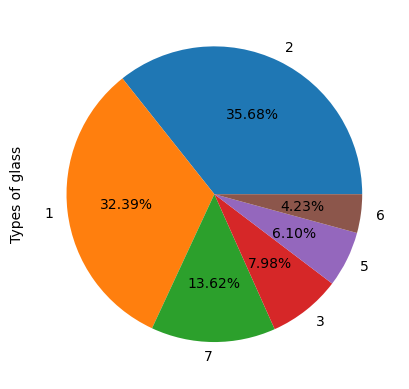

In [9]:
df['Types of glass'].value_counts().plot.pie(autopct='%.2f%%')

In [10]:
Types= pd.DataFrame([['2',76],
['1',69],
['7',29],
['3',17],
['5',13],
['6',9]])

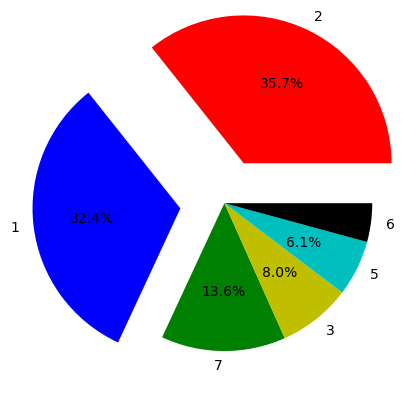

In [11]:
nums = [76,69,29,17,13,9]
Type = [2,1,7,3,5,6]
ex = [0.3,0.3,0.0,0.0,0.0,0.0]
c = ['r','b','g','y','c','k']

plt.pie(nums, labels=Type, explode=ex, colors=c, autopct='%.1f%%')
plt.show()

In [12]:
145/213*100

68.07511737089203

# This is unbalanced data . 
# Type 1 and Type 2 contains almost 70% of the data.

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [14]:
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [15]:
ros = RandomOverSampler(random_state = 0)
x_re ,y_re = ros.fit_resample(x,y)
print(sorted(Counter(y_re).items()),y_re.shape)

[('Types of glass', 1)] (456, 1)


In [16]:
y_re.value_counts()

Types of glass
1                 76
2                 76
3                 76
5                 76
6                 76
7                 76
dtype: int64

In [17]:
x=x_re
y=y_re

.

.

In [18]:
df.describe()

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe,Types of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [19]:
import matplotlib.pyplot as plt

<Axes: >

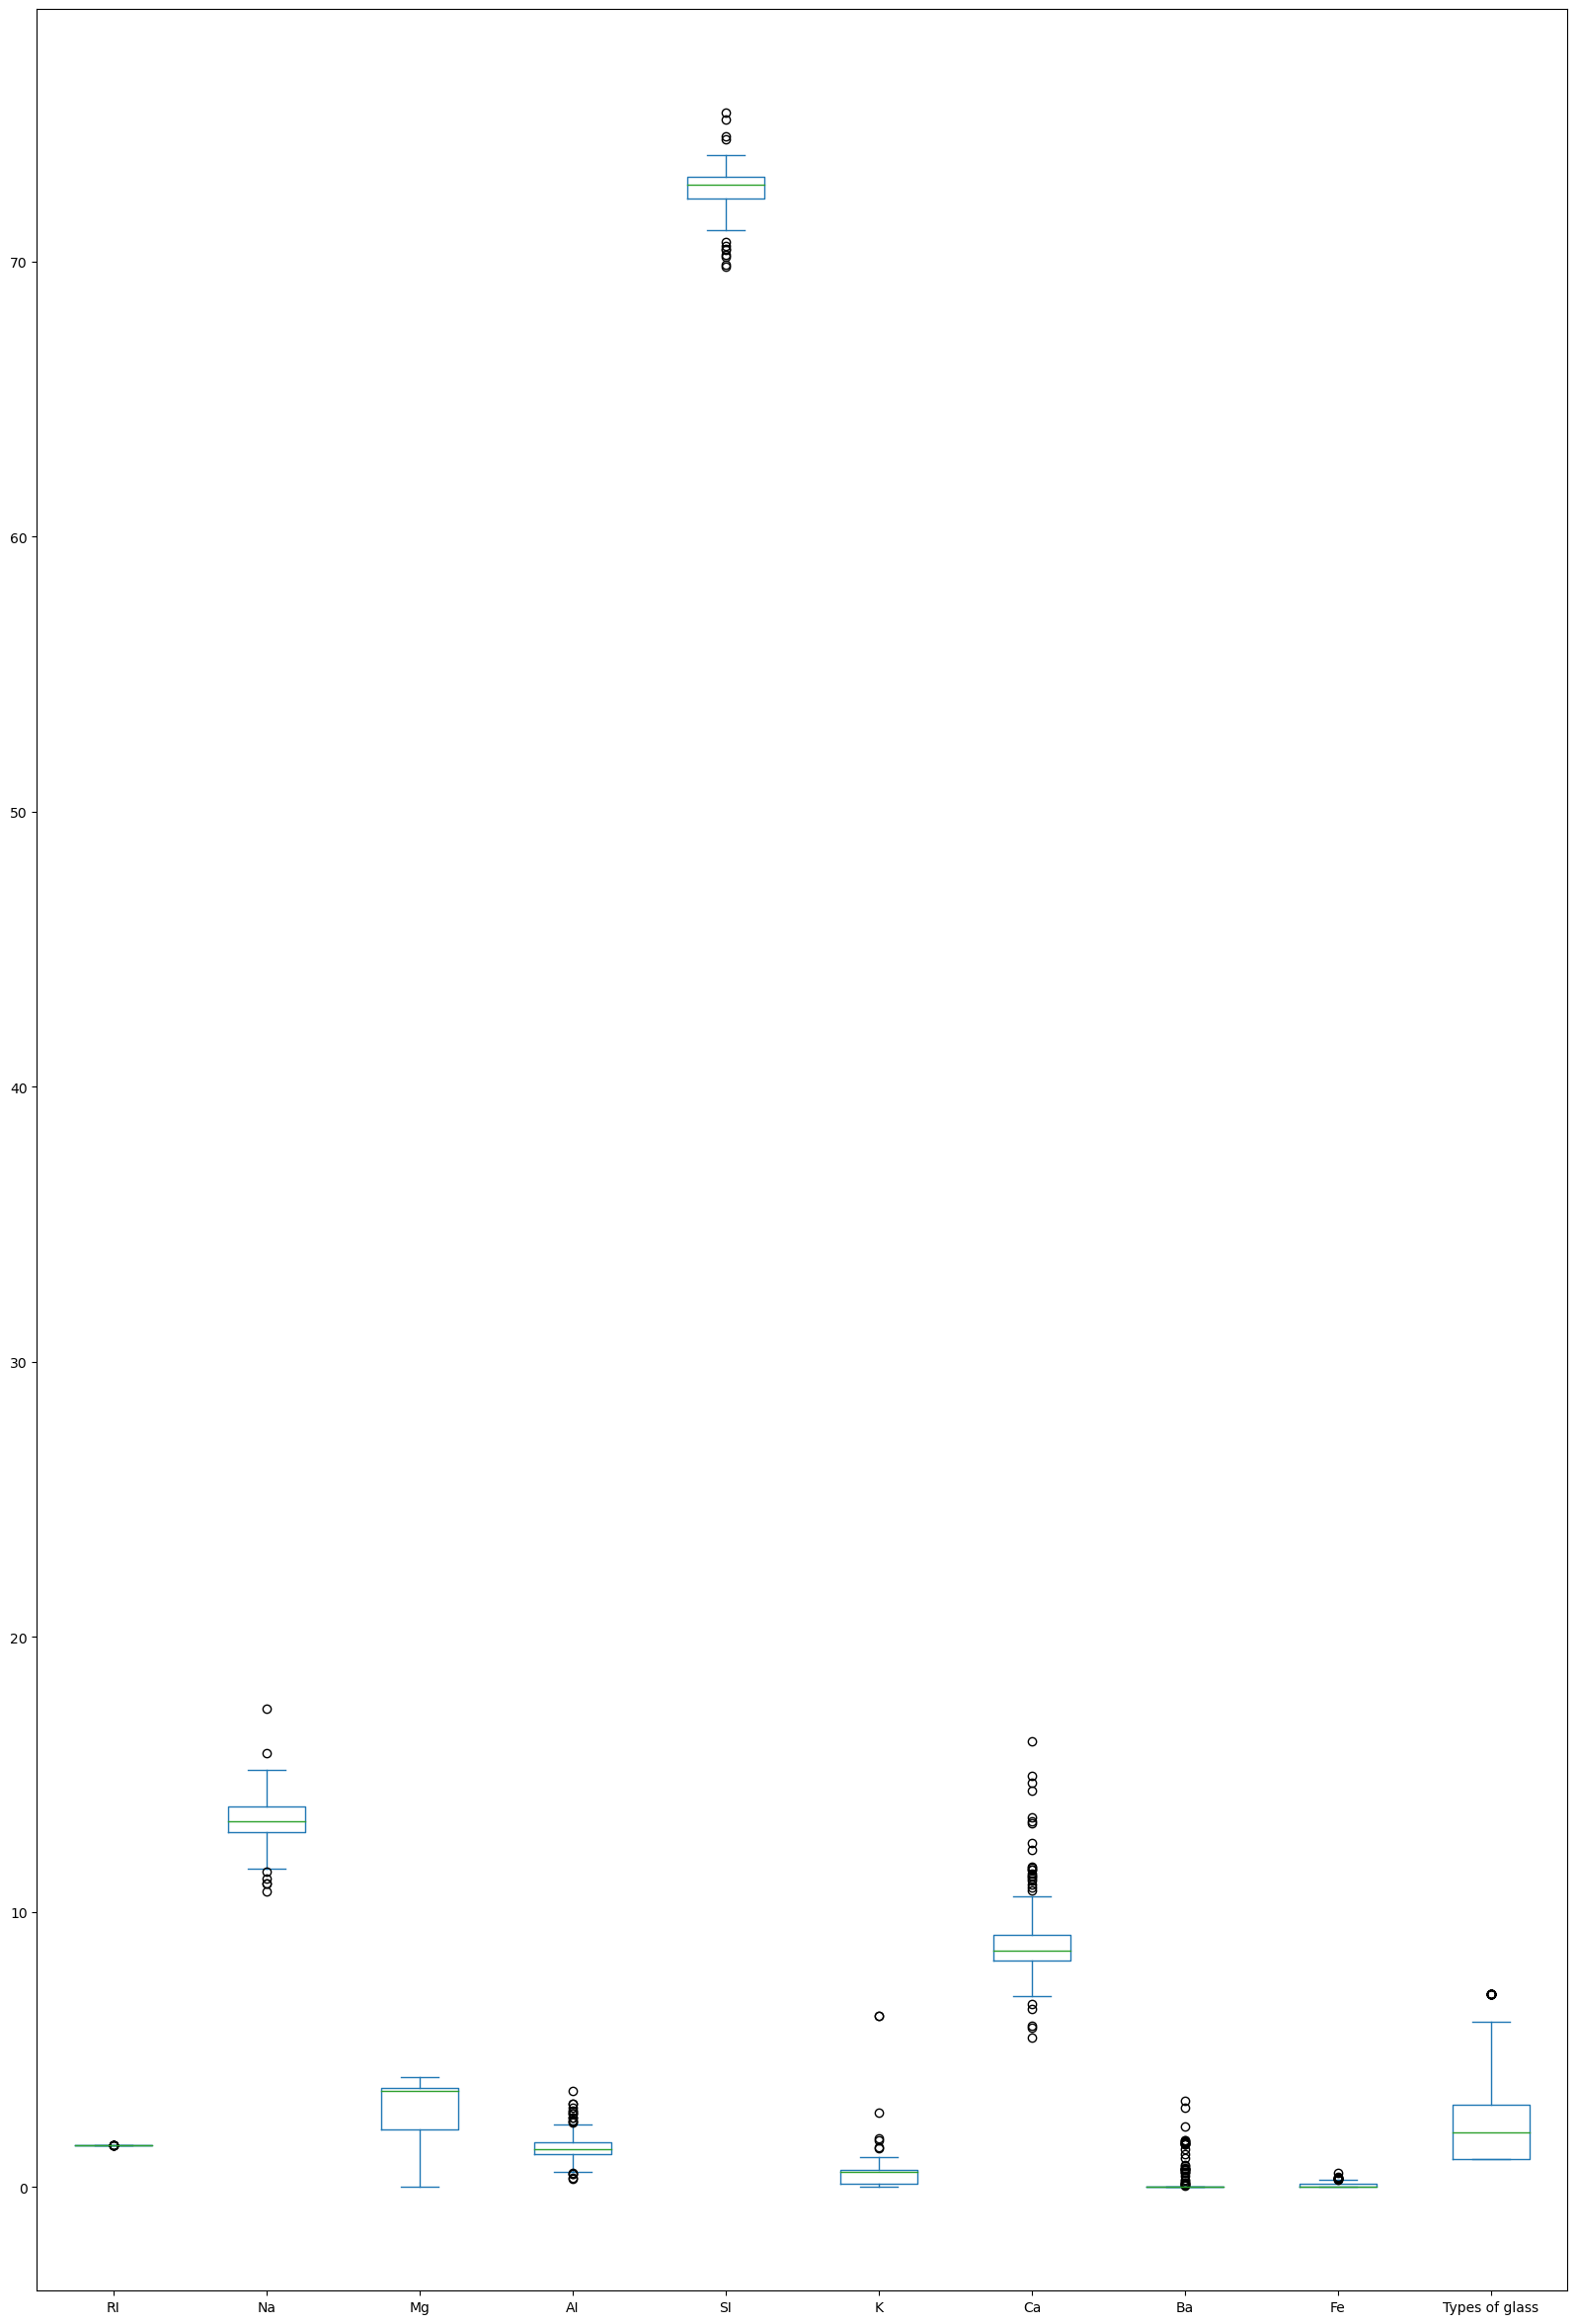

In [20]:
df.plot(kind='box',figsize=(20,30))

<Axes: >

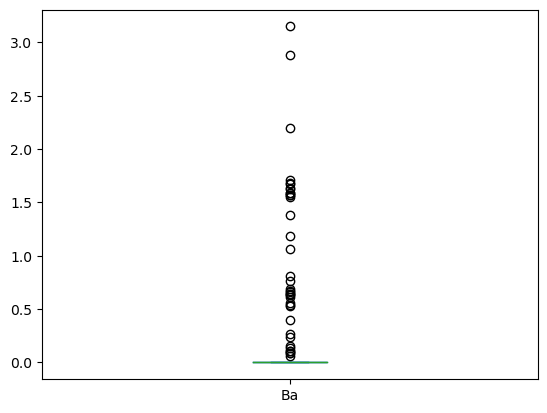

In [21]:
df['Ba'].plot(kind="box")

<Axes: >

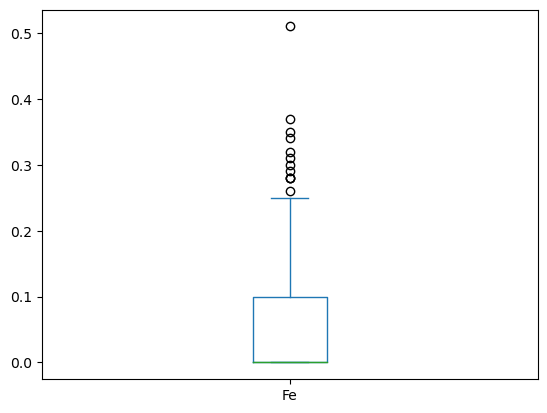

In [22]:
df['Fe'].plot(kind="box")

<Axes: >

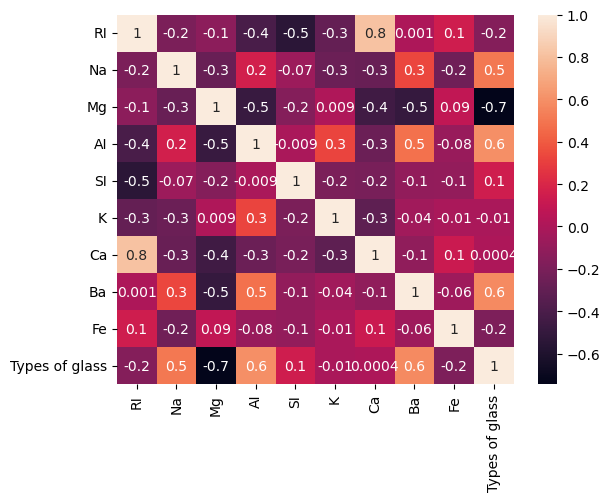

In [23]:
sns.heatmap(df.corr(), fmt='.1g', annot=True)

#  Many outliers are presesnt so now we remove these outliers

In [24]:
def finding_outliers(abc):
    q1 = abc.quantile(.25)
    q3 = abc.quantile(.75)

    iqr = q3-q1
    low = q1-1.5*iqr
    up = q3+1.5*iqr

    print('up =',up)
    print('low =',low)

In [25]:
finding_outliers(x)

up = RI     1.52375
Na    15.87500
Mg     8.85000
AI     2.65125
SI    74.28500
K      1.50000
Ca    11.72875
Ba     0.00000
Fe     0.00000
dtype: float64
low = RI     1.51207
Na    11.27500
Mg    -5.31000
AI     0.36125
SI    71.12500
K     -0.90000
Ca     6.31875
Ba     0.00000
Fe     0.00000
dtype: float64


In [26]:
x['RI'] = np.where(x['RI']>1.52, 1.52, np.where(x['RI']<1.51, 1.51, x['RI']))

In [27]:
x['Na'] = np.where(x['Na']>15.87, 15.87, np.where(x['Na']<11.27, 11.27, x['Na']))

In [28]:
x['Mg'] = np.where(x['Mg']>8.85, 8.85, np.where(x['Mg']<-5.31, -5.31, x['Mg']))

In [29]:
x['AI'] = np.where(x['AI']>2.65, 2.65, np.where(x['AI']<0.36, 0.36, x['AI']))

In [30]:
x['SI'] = np.where(x['SI']>74.28, 74.28, np.where(x['SI']<71.12, 71.12, x['SI']))

In [31]:
x['K'] = np.where(x['K']>1.50, 1.50, np.where(x['K']<-0.90, -0.90, x['K']))

In [32]:
x['Ca'] = np.where(x['Ca']>11.72, 11.72, np.where(x['Ca']<6.31, 6.31, x['Ca']))

.

.

<Axes: >

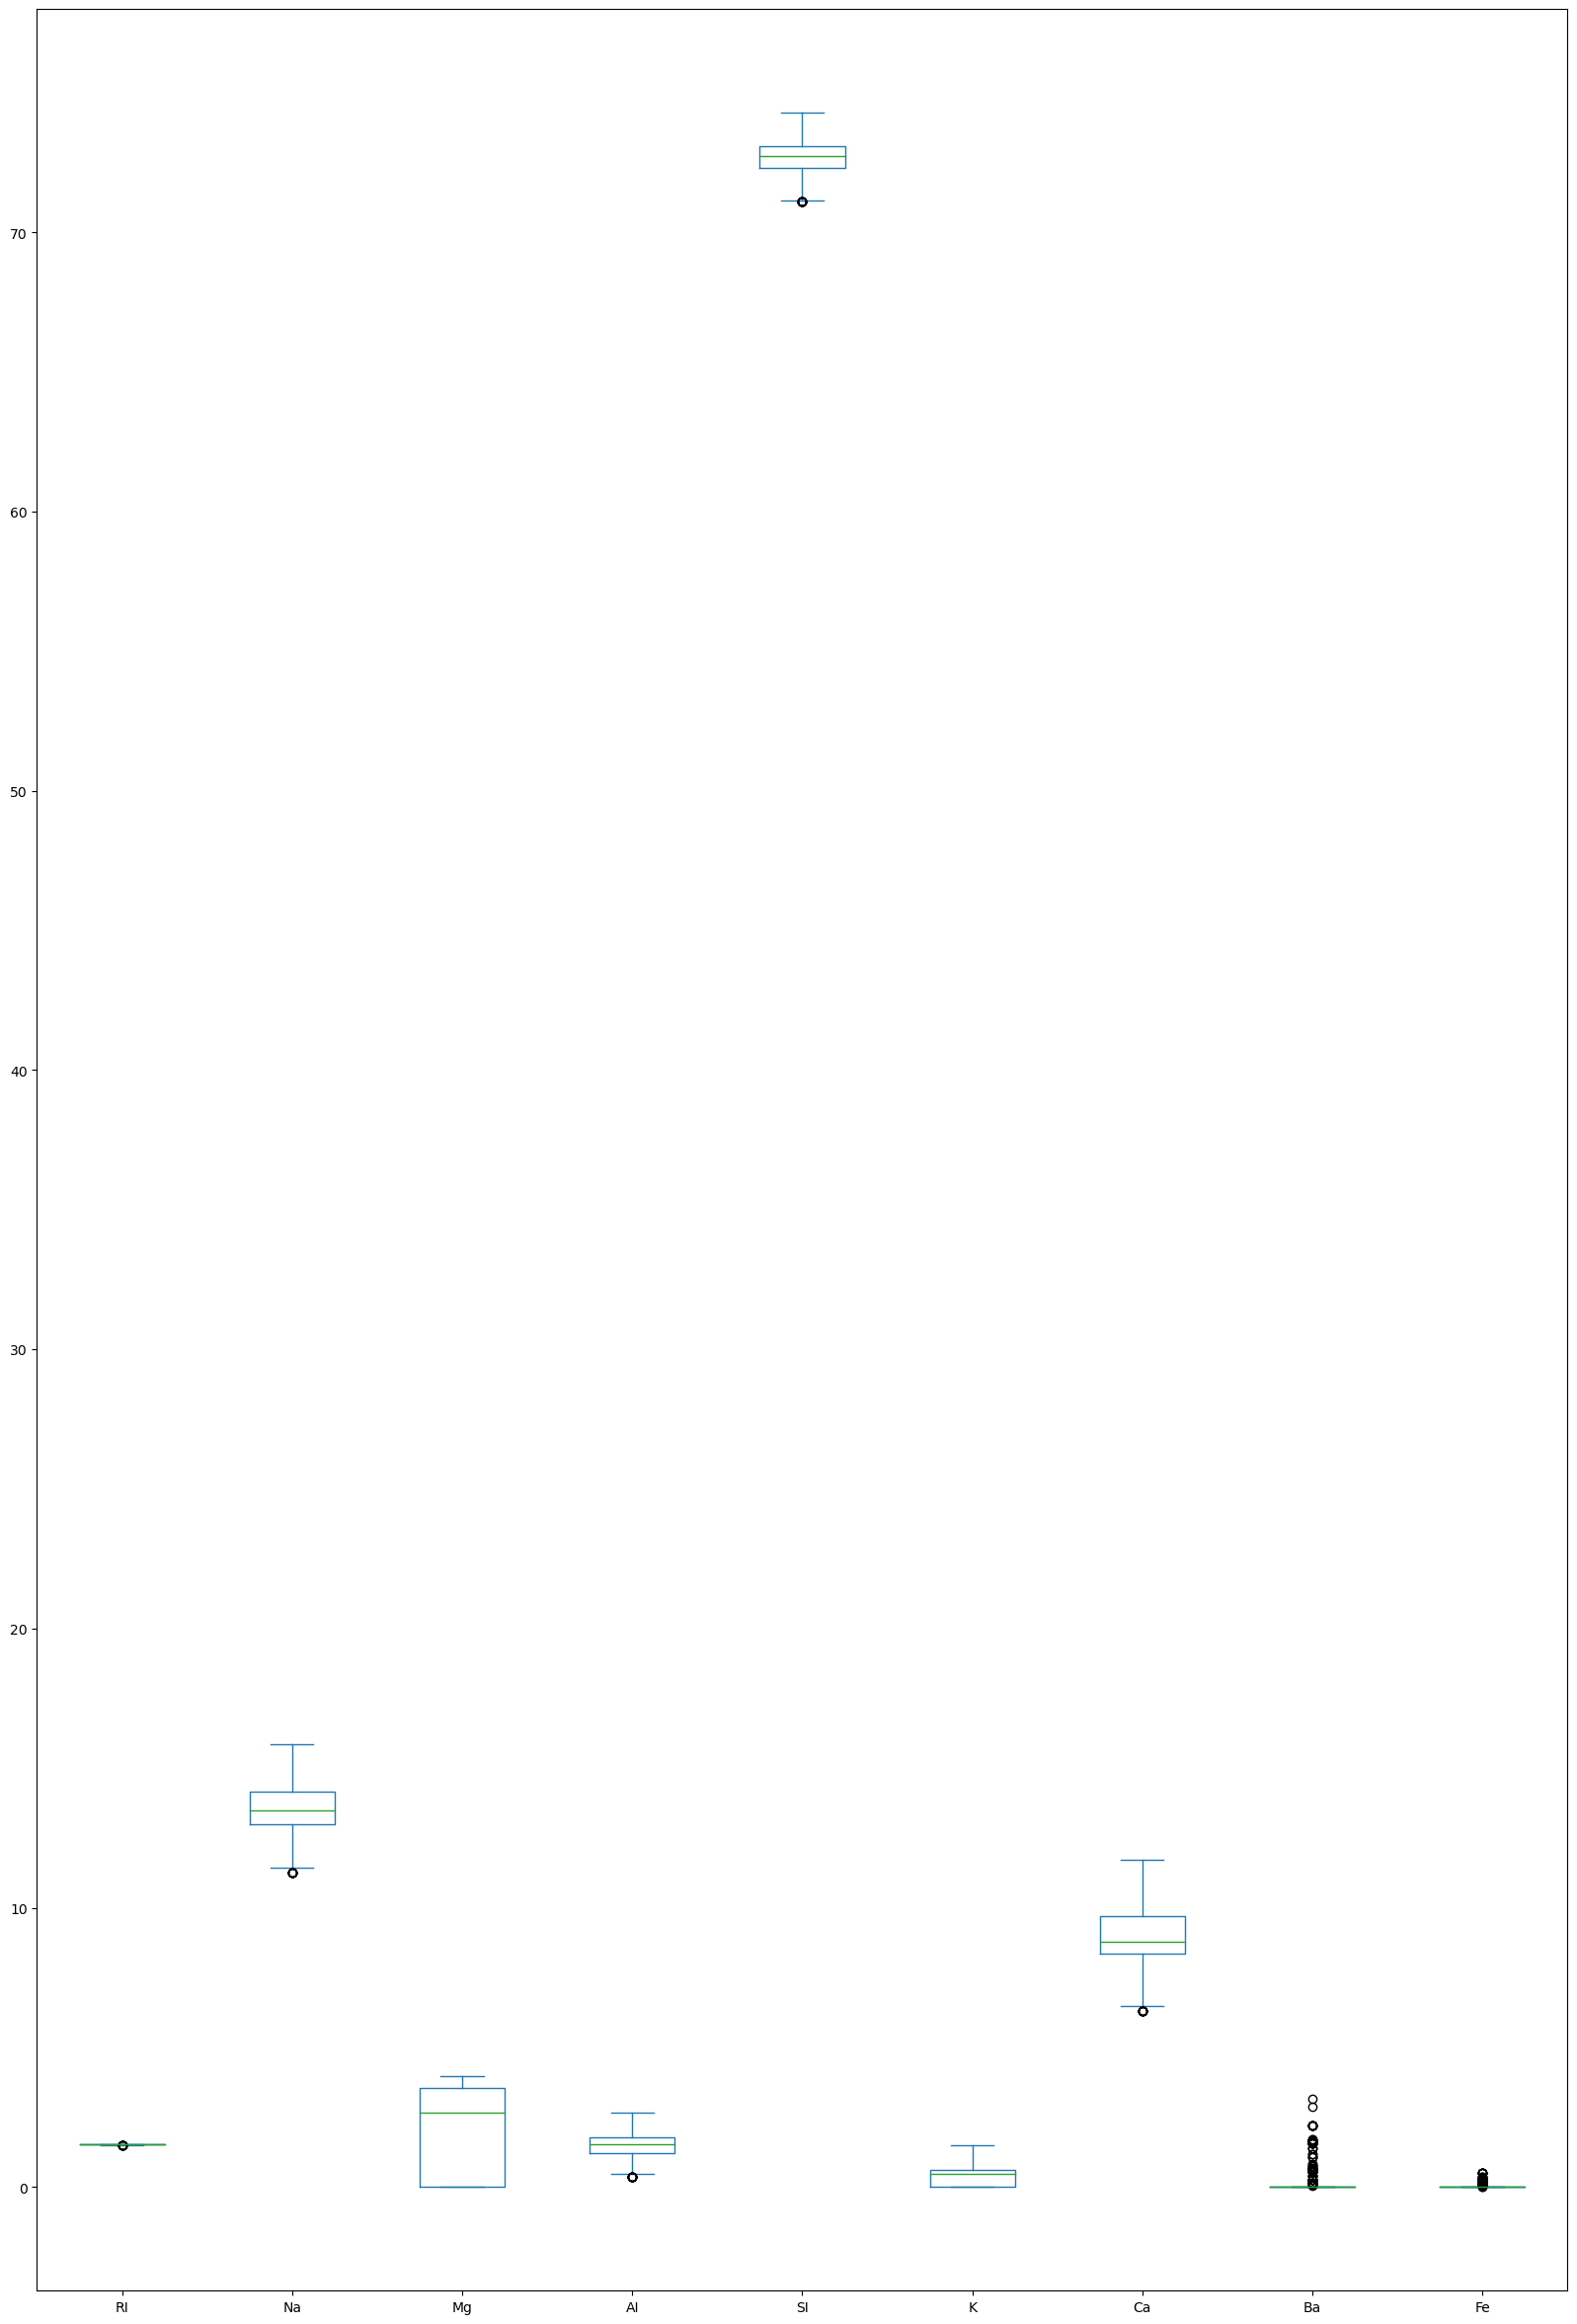

In [33]:
x.plot(kind='box',figsize=(20,30))

<Axes: >

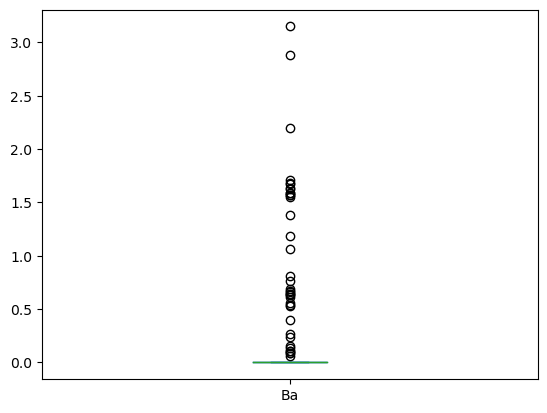

In [34]:
df['Ba'].plot(kind="box")

<Axes: >

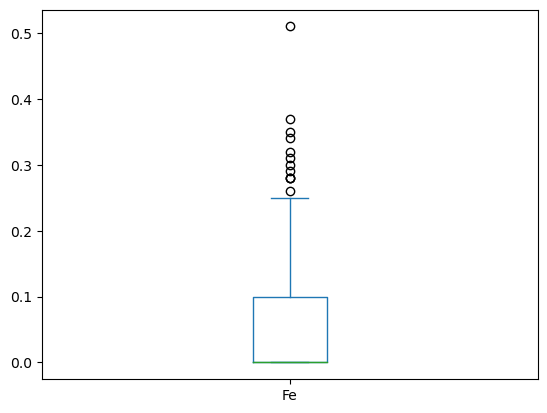

In [35]:
df['Fe'].plot(kind="box")

In [36]:
x.skew()

RI   -1.122727
Na    0.080314
Mg   -0.467814
AI    0.103304
SI   -0.144293
K     1.055991
Ca    0.293619
Ba    2.636811
Fe    2.792998
dtype: float64

# There are alot of outliers and skewness present in 'Ba' and we can't remove it and Ba is highly related to the 'Types of glass' so we should not delete it


.

.

.

<Axes: xlabel='Mg', ylabel='Types of glass'>

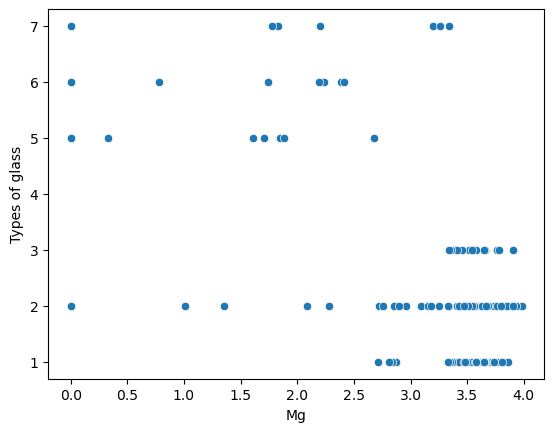

In [37]:
sns.scatterplot(x='Mg',y='Types of glass',data=df)

<Axes: xlabel='AI', ylabel='Types of glass'>

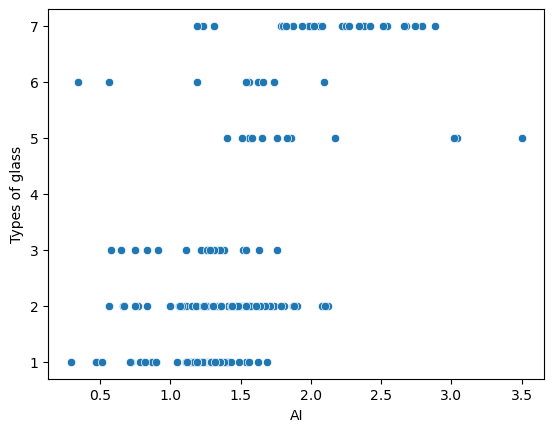

In [38]:
sns.scatterplot(x='AI',y='Types of glass',data=df)

.

.

.

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_sca = scaler.transform(x_train)
x_test_sca = scaler.transform(x_test)

In [42]:
x_train_sca= pd.DataFrame(x_train_sca, columns=x_train.columns)
x_test_sca= pd.DataFrame(x_test_sca, columns=x_test.columns)

In [43]:
x_train.describe()

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.517616,13.570157,2.142759,1.483417,72.710313,0.396834,9.073918,0.205893,0.043135
std,0.002276,0.971002,1.519959,0.562527,0.771225,0.387050,1.351378,0.542237,0.099806
min,1.511150,11.270000,0.000000,0.360000,71.120000,0.000000,6.310000,0.000000,0.000000
25%,1.516460,13.000000,0.000000,1.215000,72.250000,0.000000,8.380000,0.000000,0.000000
50%,1.517790,13.440000,2.680000,1.520000,72.740000,0.470000,8.890000,0.000000,0.000000
75%,1.519690,14.150000,3.530000,1.760000,73.105000,0.590000,9.700000,0.000000,0.000000
max,1.520000,15.870000,3.900000,2.650000,74.280000,1.500000,11.720000,3.150000,0.510000


In [44]:
x_train_sca.describe()

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe
count,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02
mean,-4.346784e-14,2.015803e-15,1.642712e-16,4.176388e-17,5.298444e-15,-1.948981e-17,1.976823e-16,2.227407e-17,1.002333e-16
std,1.001571e+00,1.001571e+00,1.001571e+00,1.001571e+00,1.001571e+00,1.001571e+00,1.001571e+00,1.001571e+00,1.001571e+00
min,-2.845791e+00,-2.372570e+00,-1.411962e+00,-2.000228e+00,-2.065302e+00,-1.026888e+00,-2.048473e+00,-3.803076e-01,-4.328660e-01
25%,-5.087470e-01,-5.881064e-01,-1.411962e+00,-4.779126e-01,-5.977982e-01,-1.026888e+00,-5.142963e-01,-3.803076e-01,-4.328660e-01
50%,7.661421e-02,-1.342543e-01,3.540130e-01,6.513565e-02,3.855318e-02,1.893323e-01,-1.363108e-01,-3.803076e-01,-4.328660e-01
75%,9.128445e-01,5.980979e-01,9.141171e-01,4.924523e-01,5.125700e-01,4.998567e-01,4.640190e-01,-3.803076e-01,-4.328660e-01
max,1.049282e+00,2.372247e+00,1.157927e+00,2.077085e+00,2.038515e+00,2.854667e+00,1.961138e+00,5.438086e+00,4.685082e+00


In [45]:
x_train_sca

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe
0,0.248261,0.154561,-1.411962,-1.644131,2.038515,-1.026888,1.420100,-0.380308,-0.432866
1,0.758802,0.072042,0.920707,-1.305839,-0.078328,-0.612856,-0.136311,-0.103241,1.975580
2,-0.609975,0.649672,-1.411962,2.077085,0.973600,-0.923380,-0.025139,0.358536,0.470301
3,-0.482340,-0.010476,0.940475,-0.023889,-0.338063,0.629242,-0.825578,-0.380308,-0.432866
4,0.371495,-0.165199,1.151338,-0.273157,-0.428970,0.292840,-0.588411,-0.380308,-0.432866
...,...,...,...,...,...,...,...,...,...
314,1.049282,-1.310144,-1.411962,-0.860717,-2.065302,-0.716364,1.961138,-0.380308,1.975580
315,1.049282,0.474320,1.065675,-1.608521,-1.195189,-0.742241,0.426962,-0.380308,-0.432866
316,0.296675,0.917857,0.064077,0.243184,-0.428970,-1.026888,0.137914,-0.380308,-0.432866
317,-0.187459,1.216987,-1.411962,0.919769,0.402183,-1.026888,-0.403124,2.556596,0.369949


In [46]:
x_test_sca

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe
0,-2.035968,0.855968,-0.265396,0.100745,2.038515,-1.026888,-1.099803,-0.380308,-0.432866
1,0.138231,-0.804718,0.894349,-0.647059,0.415169,0.629242,-0.225249,-0.380308,-0.432866
2,1.049282,-2.372570,-0.285165,0.136355,0.947627,0.473980,1.887023,-0.380308,-0.432866
3,-0.838838,-0.876921,0.867991,0.136355,0.635944,0.706873,-0.729229,-0.380308,1.975580
4,-0.469136,-0.165199,0.821865,-0.362181,-0.091314,0.318717,-0.314186,-0.380308,-0.432866
...,...,...,...,...,...,...,...,...,...
132,-0.152249,1.165413,-1.411962,1.525134,0.739838,-1.026888,-0.091842,0.838784,-0.432866
133,-0.904856,0.309283,-1.411962,1.881231,0.674905,-0.664610,0.249086,1.115851,-0.332514
134,-0.178656,-0.722199,0.881170,-0.273157,0.428156,0.422226,-0.477239,-0.380308,-0.432866
135,0.688383,0.484635,0.947064,-0.201937,-0.818573,0.422226,-0.573588,-0.380308,-0.432866


<Axes: >

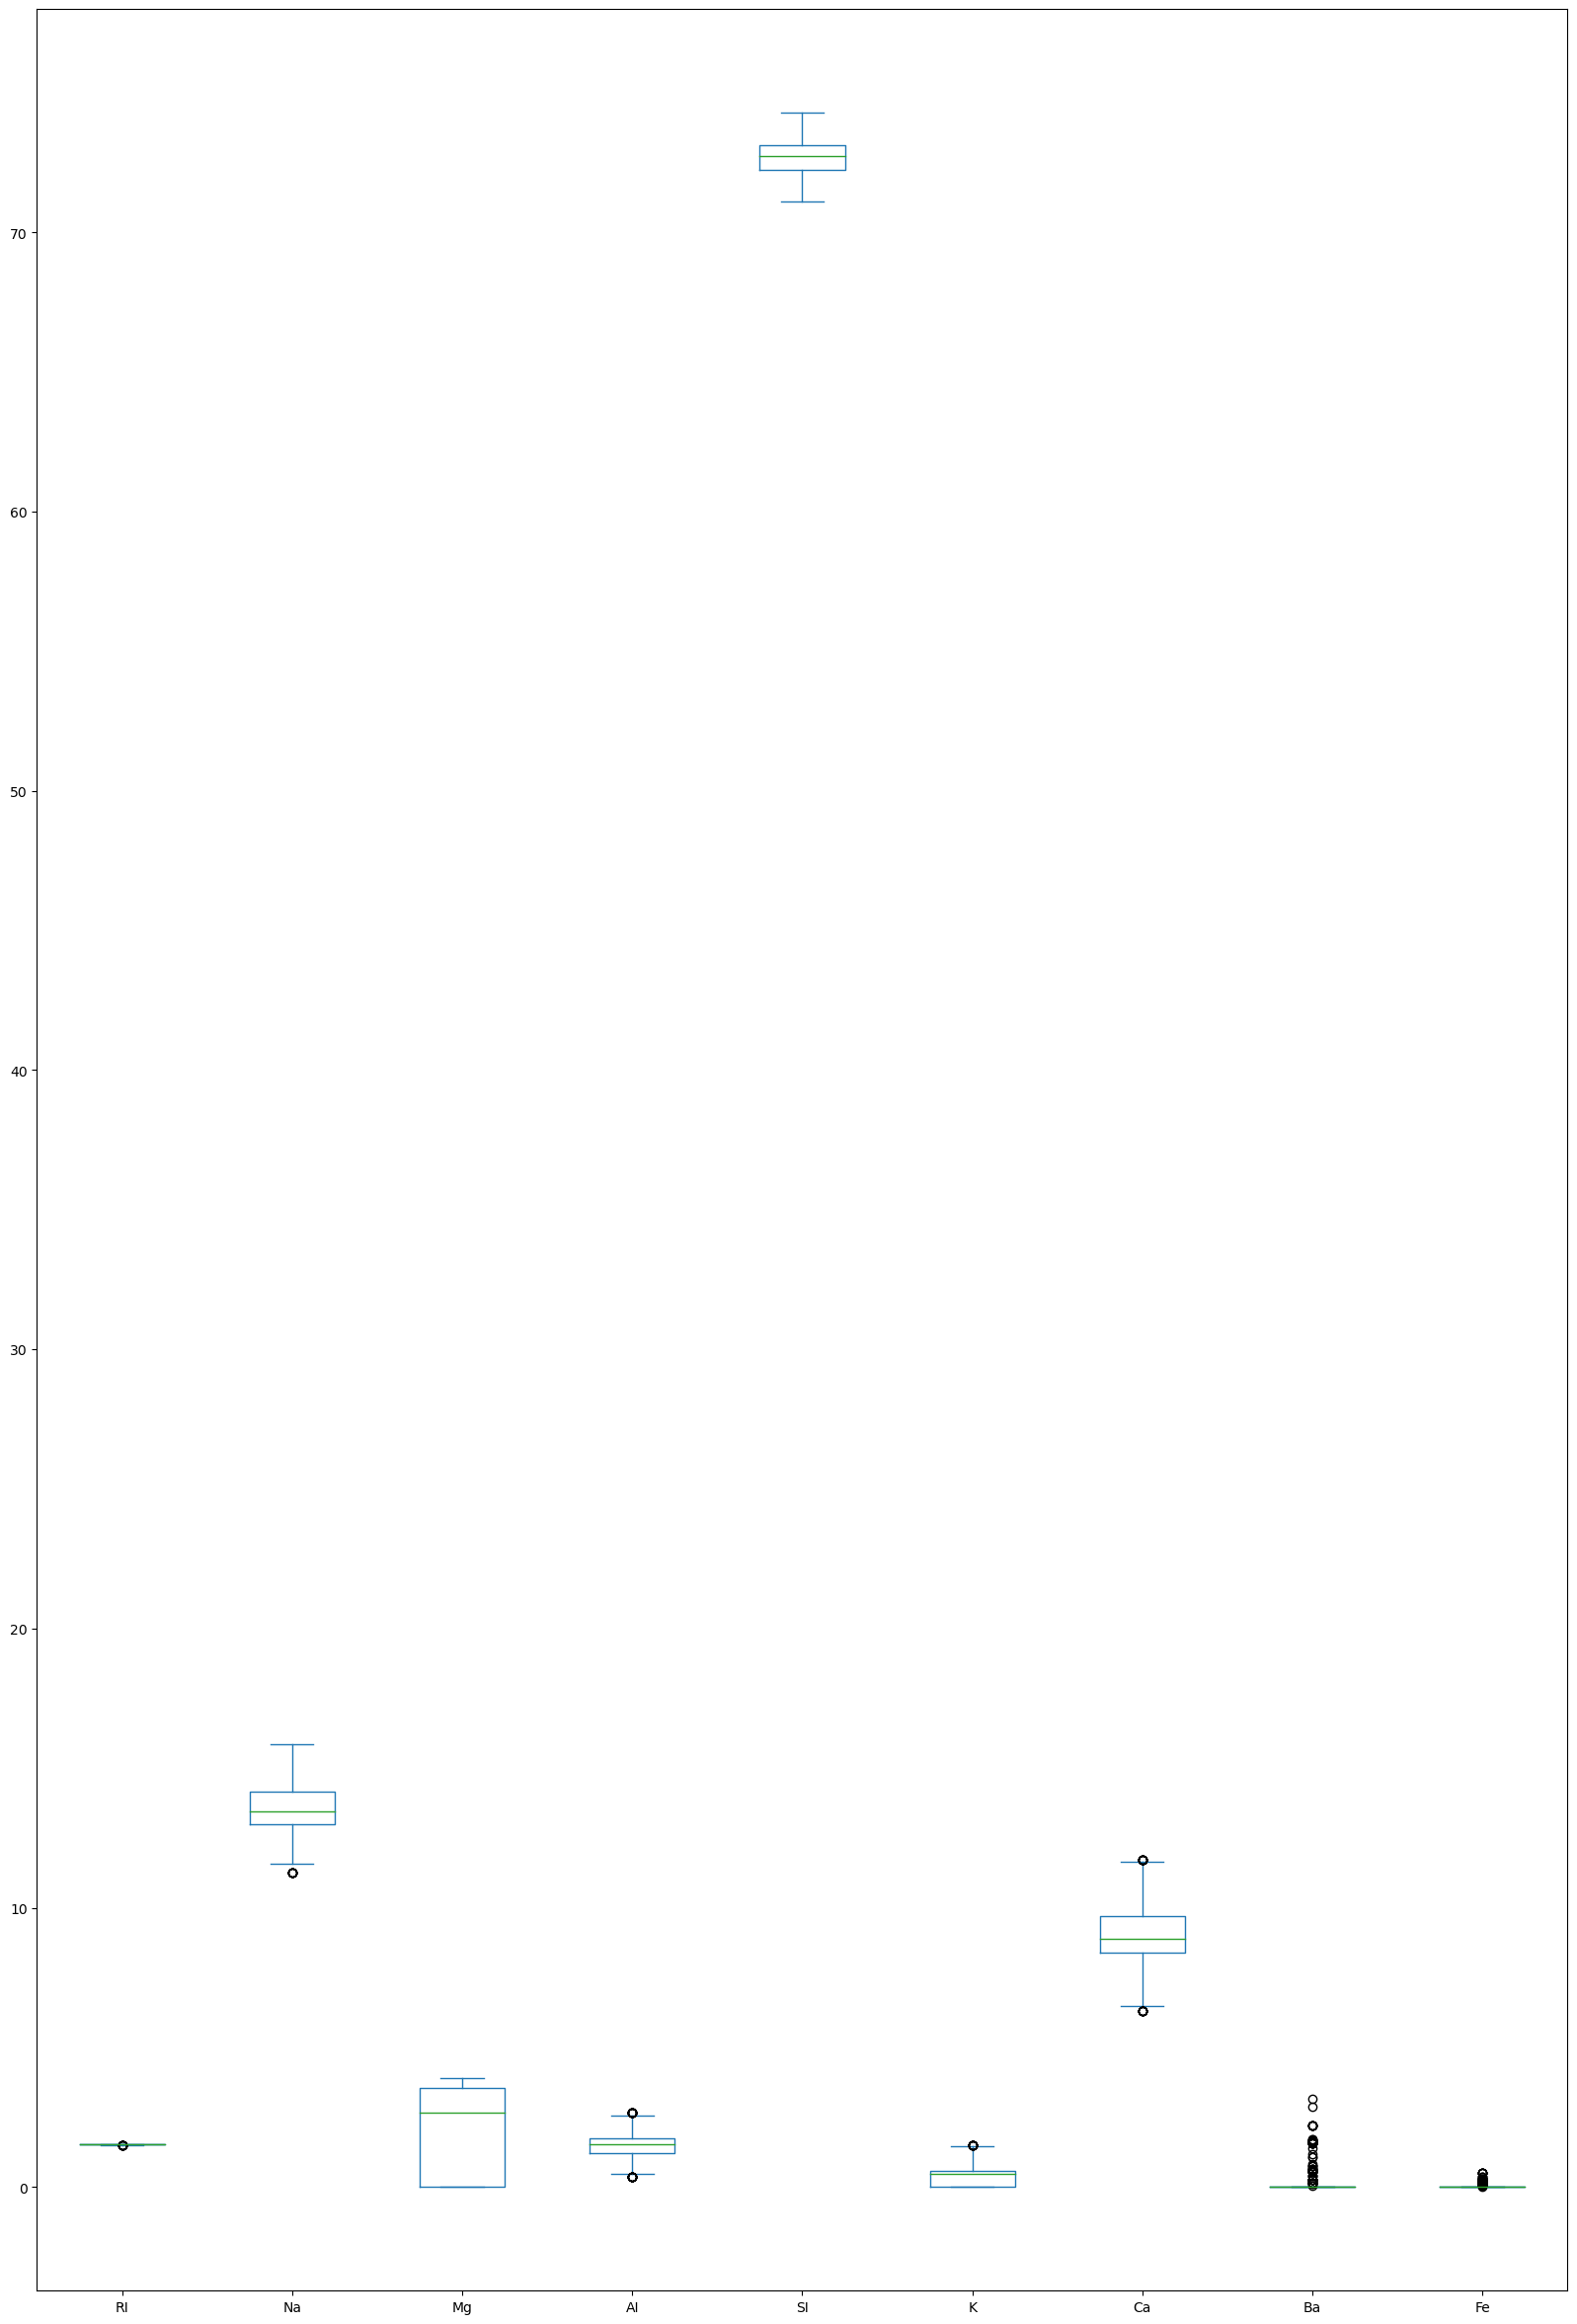

In [47]:
x_train.plot(kind='box',figsize=(20,30))

<Axes: >

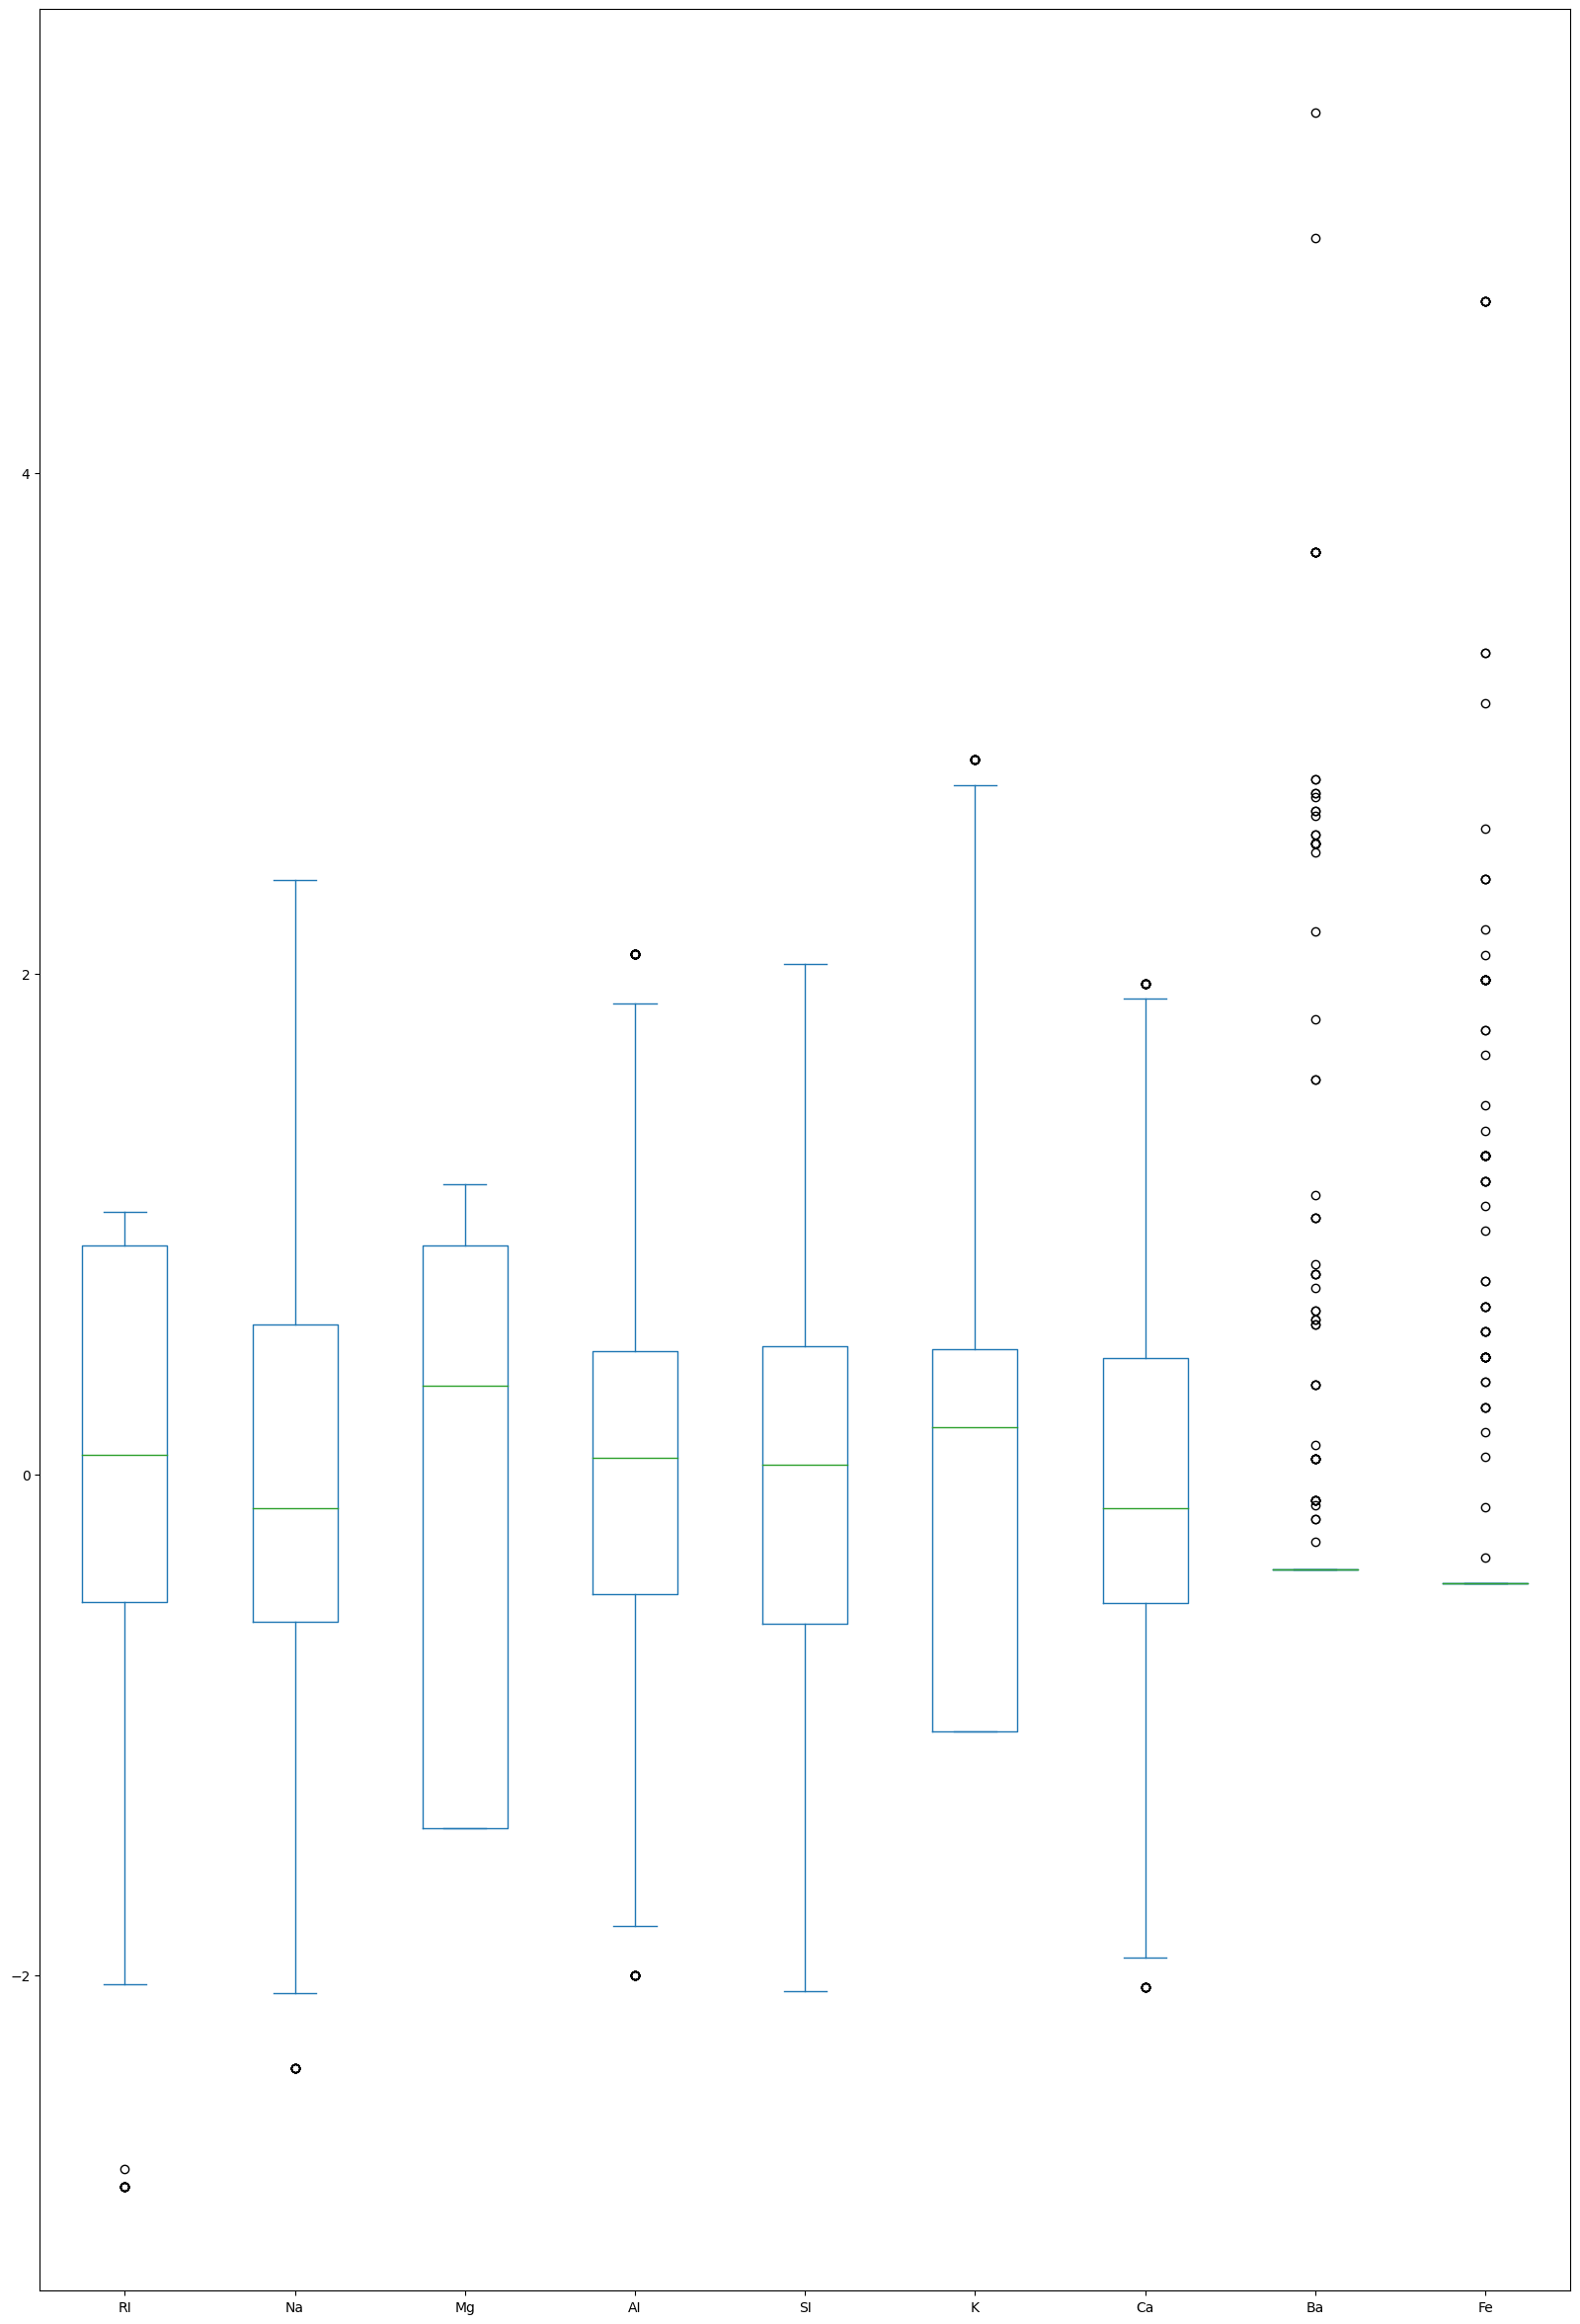

In [48]:
x_train_sca.plot(kind='box',figsize=(20,30))

In [49]:
x

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
451,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00
452,1.52000,15.79,1.83,1.31,71.12,0.31,8.61,1.68,0.00
453,1.51653,11.95,0.00,1.19,74.28,1.50,8.93,0.00,0.00
454,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00


.

#  Now the data is fully cleaned , we will train and test data

.

.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# AdaBoostClassifier

In [51]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

0.26277372262773724
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.03      0.04      0.03        25
           3       0.20      0.93      0.33        14
           5       0.58      0.82      0.68        17
           6       0.00      0.00      0.00        23
           7       0.62      0.29      0.39        28

    accuracy                           0.26       137
   macro avg       0.24      0.35      0.24       137
weighted avg       0.22      0.26      0.20       137



In [52]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abcy_pred1 = abc.predict(x_test)

print(accuracy_score(y_test,abcy_pred1))
print(classification_report(y_test,abcy_pred1))

0.26277372262773724
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.03      0.04      0.03        25
           3       0.20      0.93      0.33        14
           5       0.58      0.82      0.68        17
           6       0.00      0.00      0.00        23
           7       0.62      0.29      0.39        28

    accuracy                           0.26       137
   macro avg       0.24      0.35      0.24       137
weighted avg       0.22      0.26      0.20       137



# GradientBoostingClassifier

In [53]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sca,y_train)
gbcy_pred = gbc.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

0.9124087591240876
              precision    recall  f1-score   support

           1       0.88      0.73      0.80        30
           2       0.84      0.84      0.84        25
           3       0.82      1.00      0.90        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.98        28

    accuracy                           0.91       137
   macro avg       0.91      0.93      0.92       137
weighted avg       0.91      0.91      0.91       137



In [54]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbcy_pred1 = gbc.predict(x_test)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred1))

0.9124087591240876
              precision    recall  f1-score   support

           1       0.88      0.73      0.80        30
           2       0.84      0.84      0.84        25
           3       0.82      1.00      0.90        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.98        28

    accuracy                           0.91       137
   macro avg       0.91      0.93      0.92       137
weighted avg       0.91      0.91      0.91       137



# GaussianNB

In [55]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

0.6934306569343066
              precision    recall  f1-score   support

           1       0.68      0.70      0.69        30
           2       0.33      0.04      0.07        25
           3       0.35      0.86      0.50        14
           5       0.73      0.94      0.82        17
           6       0.92      1.00      0.96        23
           7       1.00      0.79      0.88        28

    accuracy                           0.69       137
   macro avg       0.67      0.72      0.65       137
weighted avg       0.69      0.69      0.66       137



In [56]:
gs = GaussianNB()
gs.fit(x_train,y_train)
gsy_pred1= gs.predict(x_test)

print(accuracy_score(y_test,gsy_pred1))
print(classification_report(y_test,gsy_pred1))

0.6934306569343066
              precision    recall  f1-score   support

           1       0.68      0.70      0.69        30
           2       0.33      0.04      0.07        25
           3       0.35      0.86      0.50        14
           5       0.73      0.94      0.82        17
           6       0.92      1.00      0.96        23
           7       1.00      0.79      0.88        28

    accuracy                           0.69       137
   macro avg       0.67      0.72      0.65       137
weighted avg       0.69      0.69      0.66       137



# RandomForestClassifier

In [57]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

0.9124087591240876
              precision    recall  f1-score   support

           1       0.92      0.73      0.81        30
           2       0.75      0.84      0.79        25
           3       0.88      1.00      0.93        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        28

    accuracy                           0.91       137
   macro avg       0.91      0.93      0.92       137
weighted avg       0.92      0.91      0.91       137



In [58]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcy_pred1 = rfc.predict(x_test)

print(accuracy_score(y_test,rfcy_pred1))
print(classification_report(y_test,rfcy_pred1))

0.9197080291970803
              precision    recall  f1-score   support

           1       0.92      0.77      0.84        30
           2       0.81      0.84      0.82        25
           3       0.82      1.00      0.90        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        28

    accuracy                           0.92       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.92      0.92      0.92       137



# BaggingClassifier

In [59]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

0.8832116788321168
              precision    recall  f1-score   support

           1       0.81      0.70      0.75        30
           2       0.72      0.72      0.72        25
           3       0.82      1.00      0.90        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        28

    accuracy                           0.88       137
   macro avg       0.88      0.90      0.89       137
weighted avg       0.88      0.88      0.88       137



In [60]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
bcy_pred1 = bc.predict(x_test)

print(accuracy_score(y_test,bcy_pred1))
print(classification_report(y_test,bcy_pred1))

0.9051094890510949
              precision    recall  f1-score   support

           1       0.83      0.80      0.81        30
           2       0.78      0.72      0.75        25
           3       0.88      1.00      0.93        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        28

    accuracy                           0.91       137
   macro avg       0.90      0.92      0.91       137
weighted avg       0.90      0.91      0.90       137



# LogisticRegression

In [61]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

              precision    recall  f1-score   support

           1       0.72      0.60      0.65        30
           2       0.47      0.32      0.38        25
           3       0.43      0.86      0.57        14
           5       0.77      1.00      0.87        17
           6       1.00      1.00      1.00        23
           7       1.00      0.79      0.88        28

    accuracy                           0.73       137
   macro avg       0.73      0.76      0.73       137
weighted avg       0.76      0.73      0.73       137



In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lry_pred1 = lr.predict(x_test)

print(classification_report(y_test,lry_pred1))

              precision    recall  f1-score   support

           1       0.77      0.33      0.47        30
           2       0.67      0.40      0.50        25
           3       0.24      0.71      0.36        14
           5       0.89      1.00      0.94        17
           6       0.88      1.00      0.94        23
           7       1.00      0.82      0.90        28

    accuracy                           0.68       137
   macro avg       0.74      0.71      0.69       137
weighted avg       0.78      0.68      0.69       137



# DecisionTreeClassifier

In [63]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

0.8832116788321168
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        30
           2       0.73      0.64      0.68        25
           3       0.82      1.00      0.90        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        28

    accuracy                           0.88       137
   macro avg       0.89      0.90      0.89       137
weighted avg       0.88      0.88      0.88       137



In [64]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcy_pred1 = dtc.predict(x_test)

print(accuracy_score(y_test,dtcy_pred1))
print(classification_report(y_test,dtcy_pred1))

0.8832116788321168
              precision    recall  f1-score   support

           1       0.75      0.70      0.72        30
           2       0.72      0.72      0.72        25
           3       0.88      1.00      0.93        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        28

    accuracy                           0.88       137
   macro avg       0.89      0.90      0.90       137
weighted avg       0.88      0.88      0.88       137



# SVC

In [65]:
model= SVC()
model.fit(x_train_sca,y_train)
modely_pred = model.predict(x_test_sca)
print(accuracy_score(y_test,modely_pred))
print(classification_report(y_test,modely_pred))

0.8102189781021898
              precision    recall  f1-score   support

           1       0.78      0.60      0.68        30
           2       0.60      0.48      0.53        25
           3       0.54      1.00      0.70        14
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        23
           7       1.00      0.96      0.98        28

    accuracy                           0.81       137
   macro avg       0.81      0.84      0.81       137
weighted avg       0.83      0.81      0.81       137



In [66]:
model= SVC()
model.fit(x_train,y_train)
modely_pred1 = model.predict(x_test)
print(accuracy_score(y_test,modely_pred1))
print(classification_report(y_test,modely_pred1))

0.10218978102189781
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        25
           3       0.10      1.00      0.19        14
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        28

    accuracy                           0.10       137
   macro avg       0.02      0.17      0.03       137
weighted avg       0.01      0.10      0.02       137



# (BaggingClassifier - 90 , GradientBoostingClassifier - 91 , RandomForestClassifier - 92) performed best

In [67]:
scaled = pd.DataFrame([
    [1,'GradientBoostingClassifier','90%'],
    [2,'RandomForestClassifier','91%'],
    [3,'AdaBoostClassifier','26%'],
    [4,'LogisticRegression','73%'],
    [5,'GaussianNB','70%'],
    [6,'DecisionTreeClassifier','86%'],
    [7,'svc','83%'],
    [8,'BaggingClassifier','88%']
],columns=['id','Models','scaled_Accuracy_before_cross_val'])

In [68]:
not_scaled = pd.DataFrame([
    [1,'GradientBoostingClassifier','90%'],
    [2,'RandomForestClassifier','94%'],
    [3,'AdaBoostClassifier','26%'],
    [4,'LogisticRegression','68%'],
    [5,'GaussianNB','70%'],
    [6,'DecisionTreeClassifier','87%'],
    [7,'svc','10%'],
    [8,'BaggingClassifier','88%']
],columns=['id','Models','not_scaled_Accuracy_before_cross_val'])

In [69]:
aa=scaled.merge(not_scaled)
aa

,id,Models,scaled_Accuracy_before_cross_val,not_scaled_Accuracy_before_cross_val
0,1,GradientBoostingClassifier,90%,90%
1,2,RandomForestClassifier,91%,94%
2,3,AdaBoostClassifier,26%,26%
3,4,LogisticRegression,73%,68%
4,5,GaussianNB,70%,70%
5,6,DecisionTreeClassifier,86%,87%
6,7,svc,83%,10%
7,8,BaggingClassifier,88%,88%


.

.

.

# Cross Value Score

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
recheck = cross_val_score(gbc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

[0.93478261 0.87912088 0.81318681 0.84615385 0.96703297]
0.8880554228380315
difference 0.02435333628605607


In [72]:
recheck = cross_val_score(gbc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred1) - recheck.mean())

[0.93478261 0.87912088 0.81318681 0.84615385 0.96703297]
0.8880554228380315
difference 0.02435333628605607


.

In [73]:
recheck = cross_val_score(rfc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())

[0.91304348 0.85714286 0.85714286 0.85714286 0.94505495]
0.8859053989488771
difference 0.02650336017521049


In [74]:
recheck = cross_val_score(rfc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred1) - recheck.mean())

[0.92391304 0.87912088 0.85714286 0.85714286 0.94505495]
0.8924749163879598
difference 0.02723311280912044


.

In [75]:
recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

[0.42391304 0.38461538 0.40659341 0.61538462 0.46153846]
0.45840898232202587
difference -0.19563525969428863


In [76]:
recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred1) - recheck.mean())

[0.42391304 0.38461538 0.40659341 0.61538462 0.46153846]
0.45840898232202587
difference -0.19563525969428863


.

In [77]:
recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

[0.69565217 0.75824176 0.67032967 0.62637363 0.65934066]
0.6819875776397515
difference 0.047939429659518584


In [78]:
recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred1) - recheck.mean())

[0.69565217 0.75824176 0.67032967 0.62637363 0.65934066]
0.6819875776397515
difference -0.0031554608514303695


.

In [79]:
recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

[0.60869565 0.58241758 0.7032967  0.62637363 0.58241758]
0.6206402293358816
difference 0.07279042759842502


In [80]:
recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred1) - recheck.mean())

[0.60869565 0.58241758 0.7032967  0.62637363 0.58241758]
0.6206402293358816
difference 0.07279042759842502


.

In [81]:
recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

[0.86956522 0.81318681 0.85714286 0.86813187 0.92307692]
0.8662207357859533
difference 0.016990943046163554


In [82]:
recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred1) - recheck.mean())

[0.85869565 0.84615385 0.84615385 0.87912088 0.87912088]
0.8618490205446727
difference 0.021362658287444103


.

In [83]:
recheck = cross_val_score(model,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,modely_pred) - recheck.mean())

[0.39130435 0.50549451 0.40659341 0.30769231 0.30769231]
0.38375537505972285
difference 0.42646360304246694


In [84]:
recheck = cross_val_score(model,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,modely_pred1) - recheck.mean())

[0.39130435 0.50549451 0.40659341 0.30769231 0.30769231]
0.38375537505972285
difference -0.28156559403782505


.

In [85]:
recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

[0.88043478 0.8021978  0.84615385 0.81318681 0.89010989]
0.8464166268514095
difference 0.036795051980707316


In [86]:
recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred1) - recheck.mean())

[0.90217391 0.83516484 0.83516484 0.81318681 0.92307692]
0.8617534639273771
difference 0.043356025123717834


.

# After Cross_Value_Score

In [87]:
without_over_sampling = pd.DataFrame([
    [1,'GradientBoostingClassifier','72%'],
    [2,'RandomForestClassifier','70%'],
    [3,'AdaBoostClassifier','40%'],
    [4,'LogisticRegression','56%'],
    [5,'GaussianNB','40%'],
    [6,'DecisionTreeClassifier','55%'],
    [7,'svc','35%'],
    [8,'BaggingClassifier','58%']
],columns=['id','Models','without_over_sampling_Accuracy'])

In [88]:
over_sampling = pd.DataFrame([
    [1,'GradientBoostingClassifier','90%'],
    [2,'RandomForestClassifier','90%'],
    [3,'AdaBoostClassifier','45%'],
    [4,'LogisticRegression','68%'],
    [5,'GaussianNB','62%'],
    [6,'DecisionTreeClassifier','87%'],
    [7,'svc','38%'],
    [8,'BaggingClassifier','86%']
],columns=['id','Models','over_sampled_Accuracy'])

In [89]:
over_sampled_but_not_scaled = pd.DataFrame([
    [1,'GradientBoostingClassifier','90%'],
    [2,'RandomForestClassifier','88%'],
    [3,'AdaBoostClassifier','45%'],
    [4,'LogisticRegression','68%'],
    [5,'GaussianNB','62%'],
    [6,'DecisionTreeClassifier','87%'],
    [7,'svc','38%'],
    [8,'BaggingClassifier','85%']
],columns=['id','Models','not_scaled_Accuracy'])


.

In [90]:
a=over_sampling.merge(over_sampled_but_not_scaled)

In [91]:
b=without_over_sampling.merge(a)

In [92]:
c=b.merge(aa).set_index('id')

In [93]:
c

,Models,without_over_sampling_Accuracy,over_sampled_Accuracy,not_scaled_Accuracy,scaled_Accuracy_before_cross_val,not_scaled_Accuracy_before_cross_val
id,,,,,,
1,GradientBoostingClassifier,72%,90%,90%,90%,90%
2,RandomForestClassifier,70%,90%,88%,91%,94%
3,AdaBoostClassifier,40%,45%,45%,26%,26%
4,LogisticRegression,56%,68%,68%,73%,68%
5,GaussianNB,40%,62%,62%,70%,70%
6,DecisionTreeClassifier,55%,87%,87%,86%,87%
7,svc,35%,38%,38%,83%,10%
8,BaggingClassifier,58%,86%,85%,88%,88%


# Best models:
1.GradientBoostingClassifier
2.RandomForestClassifier
3.BaggingClassifier
4.DecisionTreeClassifier

.

.

# gbc

.

In [94]:
import pickle
with open('Glass Identification.pkl','wb')as file:
    pickle.dump(gbc,file)

In [95]:
import pickle
with open('Glass Identification.pkl','rb')as file:
    Termdeposit=pickle.load(file)
Termdeposit

GradientBoostingClassifier()

In [99]:
df

,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe,Types of glass
id,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [96]:
y_test

,Types of glass
373,6
39,1
340,5
218,1
155,3
...,...
196,7
195,7
26,1
7,1


In [103]:
beta = gbc.predict(x_test)
gama = pd.DataFrame(beta)

In [104]:
theta=pd.DataFrame(y_test)

In [105]:
y_test.value_counts()

Types of glass
1                 30
7                 28
2                 25
6                 23
5                 17
3                 14
dtype: int64

In [106]:
gama.value_counts()

7    29
1    25
2    25
6    23
5    18
3    17
dtype: int64

In [107]:
gama.columns = ['predi']

In [108]:
gama['id'] = np.arange(len(gama))
theta['id'] = np.arange(len(theta))

In [109]:
compare = theta.merge(gama)

In [112]:
compare.set_index('id')

,Types of glass,predi
id,,
0,6,6
1,1,1
2,5,5
3,1,2
4,3,3
...,...,...
132,7,7
133,7,7
134,1,1
